In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Carga y Exploración de Datos:

In [5]:
# Maneja el 40% de los datos por ser muy grande el dataset
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/vehicles.parquet"
ddf = pd.read_parquet(path)
df = ddf.sample(n=5000, random_state=42)

In [6]:
pd.options.display.max_columns=40

In [7]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
100905,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,gas,38094.0,clean,other,1FTFX1EG9HKD14814,4wd,None,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
143835,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,manual,None,rwd,None,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
20235,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,None,8 cylinders,gas,30200.0,clean,automatic,None,rwd,None,convertible,None,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500
300734,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.0,bmw,328i,None,None,gas,92965.0,clean,automatic,None,None,None,None,None,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.3203,-80.6250,2021-04-25T23:53:42-0400
316249,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.0,chevrolet,suburban ls,None,8 cylinders,other,47105.0,clean,automatic,1GNSKGKC7KR124145,None,None,None,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.7839,-123.0529,2021-05-01T10:04:24-0700


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 100905 to 184630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-nul

In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,5000.0,7.311498e+09,4396341.29,7.301598e+09,7.308131e+09,7.312712e+09,7.315281e+09,7.317089e+09
price,5000.0,1.846605e+04,31564.53,0.000000e+00,5.995000e+03,1.392500e+04,2.663475e+04,1.234567e+06
year,4988.0,2.011390e+03,9.07,1.927000e+03,2.009000e+03,2.014000e+03,2.017000e+03,2.022000e+03
odometer,4943.0,1.016105e+05,279317.90,0.000000e+00,3.910350e+04,8.472300e+04,1.349145e+05,9.999999e+06
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,4915.0,3.844000e+01,5.88,-2.526000e+01,3.425000e+01,3.919000e+01,4.235000e+01,6.484000e+01
long,4915.0,-9.489000e+01,18.41,-1.593700e+02,-1.120100e+02,-8.881000e+01,-8.081000e+01,3.608000e+01


#### Precios 3.736929e+09 absolutamente altos (miles de millones), no corresponde a vehiculos normales.
#### Odometer, valores 1.000000e+07 fisicamente imposibles.
#### year, Minimo 1900, Vehiculos antes de 1900 son estadisticamente improbables.
#### lat / long cordenadas fuera de ubicación.
#### County, Todos los valores son NaN.

In [10]:
df.shape

(5000, 26)

In [11]:
df.columns= df.columns.str.lower().str.strip().str.replace(" ", "_")

 #### 2. Limpieza y Preprocesamiento:

#### Se eliminara columna region y region_url y url, no tiene sentido, para uso en los modelos.


In [12]:
df.drop(columns=["id","url", "region", "region_url", "image_url"], inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

#### No se encontraron duplicados

Para la columna year y odometer de tipo float64, se aplicara el promedio de su respectiva columna.

In [14]:
df["year"] = df["year"].fillna(df["year"].mean().round(0))
df["year"] = df["year"].astype(int)

df["odometer"] = df["odometer"].fillna(df["odometer"].mean())

#### Para las columnas con nulos se aplica moda de cada columna.
#### Columnas 'manufacturer', 'model', 'condition', 'cylinders','title_status', 'fuel','transmission', 'drive', 'type' y 'paint_color'.

In [15]:
df["manufacturer"] = df["manufacturer"].fillna(df["manufacturer"].mode()[0])
df["model"] = df["model"].fillna(df["model"].mode()[0])
df["condition"] = df["condition"].fillna(df["condition"].mode()[0])
df["cylinders"] = df["cylinders"].fillna(df["cylinders"].mode()[0])
df["title_status"] = df["title_status"].fillna(df["title_status"].mode()[0])
df["fuel"] = df["fuel"].fillna(df["fuel"].mode()[0])
df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0])
df["drive"] = df["drive"].fillna(df["drive"].mode()[0])
df["type"] = df["type"].fillna(df["type"].mode()[0])
df["paint_color"] = df["paint_color"].fillna(df["paint_color"].mode()[0])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 100905 to 184630
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5000 non-null   int64  
 1   year          5000 non-null   int64  
 2   manufacturer  5000 non-null   object 
 3   model         5000 non-null   object 
 4   condition     5000 non-null   object 
 5   cylinders     5000 non-null   object 
 6   fuel          5000 non-null   object 
 7   odometer      5000 non-null   float64
 8   title_status  5000 non-null   object 
 9   transmission  5000 non-null   object 
 10  vin           3115 non-null   object 
 11  drive         5000 non-null   object 
 12  size          1420 non-null   object 
 13  type          5000 non-null   object 
 14  paint_color   5000 non-null   object 
 15  description   5000 non-null   object 
 16  county        0 non-null      float64
 17  state         5000 non-null   object 
 18  lat           4915 non-nul

In [17]:
df.drop(columns='county', inplace=True)

#### Columna county se elimina, todos nulos

In [18]:
df["description"].isna().sum()

np.int64(0)

In [19]:
df["description"].unique()

array(["Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000976373📱 Want to instantly check this car’s availability? Call us at  863-225-1604Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7126298-74620 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 

In [20]:
df.drop(columns="description", inplace=True)

#### Se elimina columna description,datos no relevantes para el modelo

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 100905 to 184630
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5000 non-null   int64  
 1   year          5000 non-null   int64  
 2   manufacturer  5000 non-null   object 
 3   model         5000 non-null   object 
 4   condition     5000 non-null   object 
 5   cylinders     5000 non-null   object 
 6   fuel          5000 non-null   object 
 7   odometer      5000 non-null   float64
 8   title_status  5000 non-null   object 
 9   transmission  5000 non-null   object 
 10  vin           3115 non-null   object 
 11  drive         5000 non-null   object 
 12  size          1420 non-null   object 
 13  type          5000 non-null   object 
 14  paint_color   5000 non-null   object 
 15  state         5000 non-null   object 
 16  lat           4915 non-null   float64
 17  long          4915 non-null   float64
 18  posting_date  5000 non-nul

#### Se verifica que existen vehiculos con fecha inferiores a 1970, por los tanto se eliminaran de la muestra, ya que pueden influir en la eficiencia de los modelos, por tener valores muy superiores a los normales y escapan al prmedio de la mayoria.

In [22]:
df = df[df["year"] >= 1970]

In [23]:
df["posting_date"].unique()

array(['2021-05-02T15:31:06-0400', '2021-04-29T18:46:35-0500',
       '2021-04-17T14:01:33-0500', ..., '2021-04-29T15:30:21-0400',
       '2021-04-29T11:30:36-0700', '2021-04-19T11:11:17-0400'],
      dtype=object)

In [24]:
df["paint_color"].unique()

array(['white', 'black', 'blue', 'silver', 'custom', 'red', 'green',
       'grey', 'purple', 'brown', 'yellow', 'orange'], dtype=object)

In [25]:
df["manufacturer"].unique()

array(['ford', 'chevrolet', 'bmw', 'chrysler', 'mitsubishi', 'hyundai',
       'gmc', 'mercedes-benz', 'porsche', 'infiniti', 'volkswagen',
       'honda', 'subaru', 'kia', 'ram', 'jeep', 'nissan', 'toyota',
       'cadillac', 'acura', 'lexus', 'audi', 'volvo', 'mazda', 'lincoln',
       'rover', 'dodge', 'buick', 'mini', 'jaguar', 'saturn', 'tesla',
       'pontiac', 'fiat', 'mercury', 'alfa-romeo', 'ferrari',
       'aston-martin'], dtype=object)

In [26]:
df["model"].unique()

array(['f150 super cab lariat', 'corvette', '328i', ...,
       'niro lx wagon 4d', 'malibu hybrid sedan 4d',
       'wrangler unlimited sahara 4dr hardtop'], dtype=object)

In [27]:
df["condition"].unique()

array(['good', 'excellent', 'like new', 'fair', 'new', 'salvage'],
      dtype=object)

In [28]:
df.isnull().sum()

,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


In [29]:
df[df["vin"].isna()]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long,posting_date
143835,27995,2006,chevrolet,corvette,good,8 cylinders,gas,101610.523569,clean,manual,None,rwd,None,convertible,black,il,42.477800,-92.366100,2021-04-29T18:46:35-0500
20235,78423,2015,chevrolet,corvette,good,8 cylinders,gas,30200.000000,clean,automatic,None,rwd,None,convertible,white,ar,38.401800,-93.785000,2021-04-17T14:01:33-0500
300734,14000,2013,bmw,328i,good,6 cylinders,gas,92965.000000,clean,automatic,None,4wd,None,sedan,white,oh,40.320300,-80.625000,2021-04-25T23:53:42-0400
353675,15293,2015,mitsubishi,outlander sport,excellent,4 cylinders,gas,36646.000000,clean,automatic,None,fwd,None,SUV,white,tn,35.172002,-89.943849,2021-04-30T22:15:25-0500
265426,4500,2008,hyundai,elantra,good,4 cylinders,gas,111000.000000,clean,automatic,None,fwd,mid-size,sedan,silver,ny,42.805226,-73.919522,2021-04-10T12:37:17-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319976,22000,2005,gmc,sierra 2500hd,good,8 cylinders,diesel,180000.000000,clean,automatic,None,4wd,full-size,pickup,silver,or,40.576700,-122.239800,2021-04-20T23:16:50-0700
333387,6300,2011,honda,accord,good,6 cylinders,gas,132000.000000,clean,automatic,None,fwd,None,coupe,silver,pa,39.922700,-75.181200,2021-04-29T08:29:37-0400
304364,800,2004,honda,accord,good,6 cylinders,gas,195000.000000,clean,automatic,None,4wd,None,sedan,white,ok,35.518400,-97.574600,2021-05-04T17:47:08-0500
144601,2500,2002,chevrolet,impala,good,6 cylinders,gas,158042.000000,clean,automatic,None,fwd,mid-size,sedan,brown,il,42.263406,-89.029306,2021-04-29T16:45:51-0500


Se eliminan columnas vin, size

In [30]:
df.drop(columns='vin', inplace=True)

In [31]:
df.drop(columns='size', inplace=True)

In [32]:
df.drop(columns='lat', inplace=True)


In [33]:
df.drop(columns='long', inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4946 entries, 100905 to 184630
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4946 non-null   int64  
 1   year          4946 non-null   int64  
 2   manufacturer  4946 non-null   object 
 3   model         4946 non-null   object 
 4   condition     4946 non-null   object 
 5   cylinders     4946 non-null   object 
 6   fuel          4946 non-null   object 
 7   odometer      4946 non-null   float64
 8   title_status  4946 non-null   object 
 9   transmission  4946 non-null   object 
 10  drive         4946 non-null   object 
 11  type          4946 non-null   object 
 12  paint_color   4946 non-null   object 
 13  state         4946 non-null   object 
 14  posting_date  4946 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 618.2+ KB


In [35]:
df["posting_date"].value_counts()

,count
posting_date,
2021-05-01T13:05:31-0400,2
2021-04-21T13:50:53-0400,2
2021-04-29T08:36:09-0400,2
2021-04-27T19:45:10-0700,2
2021-04-16T13:31:54-0400,2
...,...
2021-04-23T15:11:36-0400,1
2021-04-26T05:46:15-0400,1
2021-05-04T11:21:15-0400,1


In [36]:
## Se agrego la moda a los valores faltantes
df['posting_date'] = df['posting_date'].fillna(df['posting_date'].mode()[0])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4946 entries, 100905 to 184630
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4946 non-null   int64  
 1   year          4946 non-null   int64  
 2   manufacturer  4946 non-null   object 
 3   model         4946 non-null   object 
 4   condition     4946 non-null   object 
 5   cylinders     4946 non-null   object 
 6   fuel          4946 non-null   object 
 7   odometer      4946 non-null   float64
 8   title_status  4946 non-null   object 
 9   transmission  4946 non-null   object 
 10  drive         4946 non-null   object 
 11  type          4946 non-null   object 
 12  paint_color   4946 non-null   object 
 13  state         4946 non-null   object 
 14  posting_date  4946 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 618.2+ KB


#### Corregir inconsistencias en los datos categóricos.

In [38]:
columnas_categoricas = df.select_dtypes(include='object').columns.to_list()
columnas_categoricas

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state',
 'posting_date']

In [39]:
df["cylinders"].unique()

array(['6 cylinders', '8 cylinders', '4 cylinders', 'other',
       '5 cylinders', '10 cylinders', '12 cylinders', '3 cylinders'],
      dtype=object)

In [40]:
cylin = { '3 cylinders':3,
          '4 cylinders':4,
          '5 cylinders':5,
          '6 cylinders':6,
          '8 cylinders':8,
          '10 cylinders':10,
          '12 cylinders':12,
          'other':0
          }

df["cylinders"] = df["cylinders"].replace(cylin)

/tmp/ipython-input-40-2902565068.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cylinders"] = df["cylinders"].replace(cylin)


In [41]:
df["cylinders"] = df["cylinders"].astype(int)

In [42]:
df_1 = df.groupby(["manufacturer", "condition"])["price"].mean().reset_index()
print(df_1)

    manufacturer  condition         price
0          acura  excellent  13845.066667
1          acura       fair   1997.500000
2          acura       good  22499.734694
3          acura   like new   9780.333333
4     alfa-romeo       good  27544.125000
..           ...        ...           ...
132   volkswagen       good  13734.571429
133   volkswagen   like new   9566.333333
134        volvo  excellent  23416.333333
135        volvo       good  11966.483871
136        volvo   like new  12786.250000

[137 rows x 3 columns]


##### SE eliminaran filas con descripcion en columna modelo con caracteres especiales que pueden causar error en los siguentes procesos de modelamiento

In [43]:
# Identificar las filas que contienen caracteres especiales en la columna 'model' con expresion regular
filas_a_eliminar = df[df['model'].str.contains('[^a-zA-Z0-9\s]', regex=True)]

# Eliminar las filas identificadas del DataFrame original
df = df.drop(filas_a_eliminar.index)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, 100905 to 184630
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4186 non-null   int64  
 1   year          4186 non-null   int64  
 2   manufacturer  4186 non-null   object 
 3   model         4186 non-null   object 
 4   condition     4186 non-null   object 
 5   cylinders     4186 non-null   int64  
 6   fuel          4186 non-null   object 
 7   odometer      4186 non-null   float64
 8   title_status  4186 non-null   object 
 9   transmission  4186 non-null   object 
 10  drive         4186 non-null   object 
 11  type          4186 non-null   object 
 12  paint_color   4186 non-null   object 
 13  state         4186 non-null   object 
 14  posting_date  4186 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 523.2+ KB


#### 3. Exploración de Datos:

In [45]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
100905,36990,2017,ford,f150 super cab lariat,good,6,gas,38094.000000,clean,other,4wd,pickup,white,fl,2021-05-02T15:31:06-0400
143835,27995,2006,chevrolet,corvette,good,8,gas,101610.523569,clean,manual,rwd,convertible,black,il,2021-04-29T18:46:35-0500
20235,78423,2015,chevrolet,corvette,good,8,gas,30200.000000,clean,automatic,rwd,convertible,white,ar,2021-04-17T14:01:33-0500
300734,14000,2013,bmw,328i,good,6,gas,92965.000000,clean,automatic,4wd,sedan,white,oh,2021-04-25T23:53:42-0400
316249,676,2019,chevrolet,suburban ls,good,8,other,47105.000000,clean,automatic,4wd,sedan,black,or,2021-05-01T10:04:24-0700


 #### Visualización de Datos:

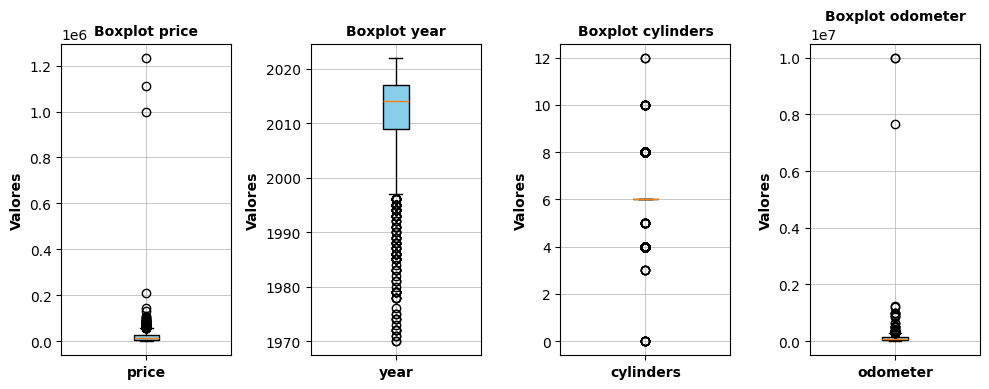

In [46]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(1,4, figsize=(10, 4))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Boxplot para las columnas numéricas
num_cols = df.select_dtypes(include=['int64','float64']).columns
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(num_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### En el boxplot del Precio los valores oscilan entre 0.0  3.5. La mayoria de los vehículos tienen precios bajos. Muchos vehículos economicos y pocos de alto nivel. Se ven outliers a partir de 1.0. Esto seria por ñlos valores de los autos de lujo.

#### En el boxplot del año, se distingue vehículos desde 1970 a 2020. La caja principal probablemente cubre vehículos recientes 2000-2020.El bigote inferior indican vehículos antiguos 1970-1990. Mayor concentracion de vehículos modernos. Pocos vehículos muy antiguos.

#### En el gráfico de cylinders, valores entre 0 y 12, la mediana esta cerca de 4 a 6 cilindros, Autos comunes. Vehiculos con 8 cilindros son memos frecuentes.Dominio de motores standard.
#### En el boxplot de odometer. Valores entre 0.0 y 1.0, mediana baja 0.2 aproximado, indicando bajo kilometraje. Algunos vehículos con kilometraje muy alto. predominan vehículos con bajo uso. valores cerca de 1 podrian ser outliers.

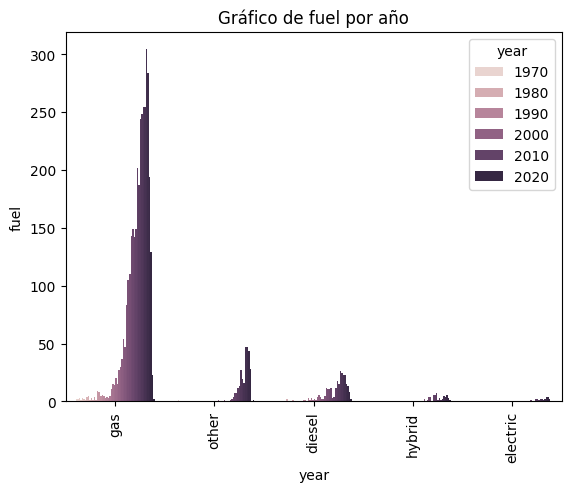

In [47]:
sns.countplot(data=df, x='fuel',hue='year')
plt.title("Gráfico de fuel por año")
plt.xlabel("year")
plt.ylabel("fuel")
plt.xticks(rotation=90)
plt.show()

#### Se observa en el gráfico que la mayor cantidad verhículos estan distribuidos en fuel a gas y en el rango entre 2000 a 2020, y el resto en otros, diesel, hibridos y electricos. Con valores muy altos en 30000.


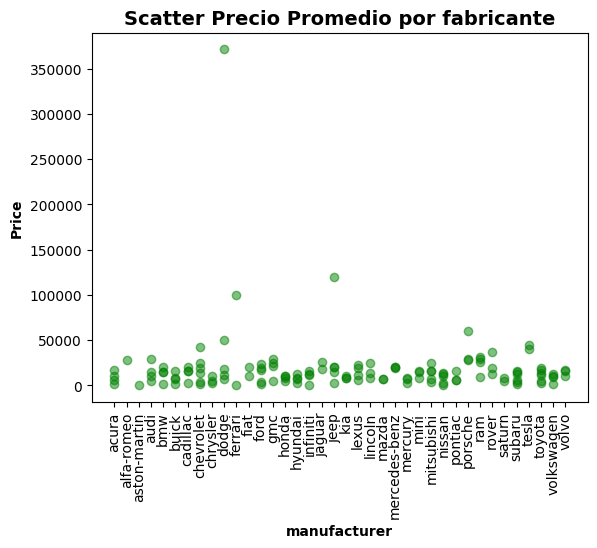

In [48]:
# Se creo un nuevo dataframe con el promedio de 'price' clasificado por 'manufacturer' y se resetean los indices
ds_df = df.groupby(["manufacturer", "condition"])["price"].mean().reset_index()

# Grafico Scatter que muestra correlación de Modelo y precio
plt.scatter(ds_df["manufacturer"], ds_df["price"], color='green', alpha=0.5 )

plt.title("Scatter Precio Promedio por fabricante", fontsize=14, fontweight='bold')
plt.xlabel("manufacturer", fontweight='bold')
plt.ylabel("Price", fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### El gráfico se observa que la mayor cantidad de marcas de vehículos se encuentra con promedio bajos de precio en el rango de 0 a 50000. Muy pocas marcas se escapan de la distribucion alcanzanco promedo de 350000. que deberian ser marcas de lujo.

In [49]:
# Se reviza los datos con la correlaciones de Pearson
df_numericas =df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

              price      year  cylinders  odometer
price      1.000000  0.138314   0.120214 -0.050426
year       0.138314  1.000000  -0.099565 -0.196451
cylinders  0.120214 -0.099565   1.000000  0.038163
odometer  -0.050426 -0.196451   0.038163  1.000000


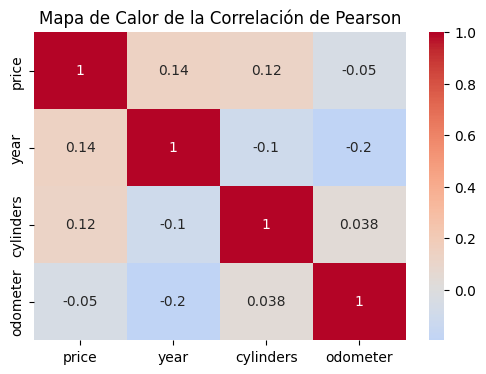

In [50]:
# Se Crea el  mapas de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### Los valores estan cercanos a cero, se observa ausencia de correlación entre variables.
#### price con year 0.14 de correlación. El año del vehículo no influye en su precio.
#### price con odometer, Correlación -0.05. El kilometraje no afecta el precio.
#### year con odometer -0.02. relación inversa entre año y kilometraje.

#### No existe correlaciones lineales relevantes entre las variables.

#### El precio de los vehículos no depende del año ni del kilometraje en este conjunto de datos.
#### Marca , modelo, condicion podrian explicar mejor el precio.





#### 4. Modelado y Evaluación:

In [74]:
X = df.drop(columns=['price','manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state',
       'posting_date'])

y = df['price']

In [75]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Se escala caracteristicas numericas
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Modelo de Regresión

In [77]:
# Regresión Lineal
modelo_lr = LinearRegression()

# Se entrena el modelo de regresion lineal
modelo_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = modelo_lr.predict(X_test)



In [87]:
# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
# rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'\nLinear Regression')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'R-cuadrado: {r2_lr:.2f}')



Linear Regression
MSE: 199698656.30
RMSE: 14131.48
R-cuadrado: 0.22


####  Modelo RandomForestRegressor

In [55]:
# Se separan las columnas
numeric_cols = ['year', 'cylinders', 'odometer']
categorica_cols = ['manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'posting_date']

In [56]:
# Se separa variables
X = df.drop(columns=['price'])
y = df['price']

In [57]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Preprocesador Random forest.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorica_cols)
])

# Modelo Randm forest.
pipeline_forest = Pipeline([
    ("p_forest", preprocessor_forest),
    ("modelforest", RandomForestRegressor())
])

In [59]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('p_forest',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'cylinders',
                                                   'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state',
                                                   'posting_date'])])),
                ('modelforest', RandomForestRegressor())])

In [60]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

In [86]:
# Evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_score_forest = r2_score(y_test, y_pred_forest)
print(f'MSE: {mse_forest:.2f}')
print(f'RMSE: {rmse_forest:.2f}')
print(f'R-cuadrado: {r2_score_forest:.2f}')

MSE: 111022046.57
RMSE: 10536.70
R-cuadrado: 0.57


#### Evaluación de Modelo Regresión Lineal y RandomForest
#### Segun la metrica:
* MSE es menor en el modelo Randomforest.
* RMSE es menor en el modelo de RandomForest.
* R-cadrado es mayor en el modelo RandomForest.
#### Al ser el error menor y la prediccion mayor se elige el modelo RandomForest, por obtener mejor eficacia en los datos.

 #### Optimización del Modelo  RandomForet:

In [64]:
# Preprocesador Randomforest
preprocessor_forest2 = ColumnTransformer(transformers=[
                        ('scaler2', 'passthrough', numeric_cols),
                        ("cat2", OneHotEncoder(handle_unknown='ignore'), categorica_cols)
                    ])

# Modelo Randomforest.
pipeline_forest2 = Pipeline(steps=[
    ("pp2", preprocessor_forest2),
    ("model2",  RandomForestRegressor())
])

In [65]:
# Optimizacion de hiperparametros.
forest2_params = {
     'model2__random_state': [5, 10, 20],
     'model2__max_depth': [5, 10, 15]
}

forest2_grid = GridSearchCV(pipeline_forest2, forest2_params)
forest2_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp2',
                                        ColumnTransformer(transformers=[('scaler2',
                                                                         'passthrough',
                                                                         ['year',
                                                                          'cylinders',
                                                                          'odometer']),
                                                                        ('cat2',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state',
                                                                          'posting_date'])])),
                                       ('model2', RandomForestRegressor())]),
             param_grid={'model2__max_depth': [5, 10, 15],
                         'model2__random_state': [5, 10, 20]})

In [66]:
# Evaluación.
forest2_best = forest2_grid.best_estimator_
y_pred_forest2 = forest2_best.predict(X_test)


In [67]:
print("Randomforest")
print("Mejores parámetros:", forest2_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest2))

Randomforest
Mejores parámetros: {'model2__max_depth': 15, 'model2__random_state': 5}
R²: 0.5556081057835556


#### Al buscar  la optimizacion de parametros con GridSearch se obtuvo que los mejores valores para los parametros ma_depth y random_state son 15 y 5.
#### Se aplica el modelo Randomforest con estos parametros para ver las mejoras.

In [69]:
preprocessor_forest3 = ColumnTransformer(transformers=[
                        ('scaler3', StandardScaler(), numeric_cols),
                        ("cat3", OneHotEncoder(handle_unknown='ignore'), categorica_cols)
                    ])

# Modelo RandomForest optimizado.
pipeline_forest3 = Pipeline(steps=[
    ("pp3", preprocessor_forest3),
    ("model3",  RandomForestRegressor(max_depth=15, random_state=5))
])


# Entrenamiento Randomforest.
pipeline_forest3.fit(X_train, y_train)

# Prediccion RandomForest.
y_pred_forest3 = pipeline_forest3.predict(X_test)

In [90]:
# Metrica Randomforest
mse3 = mean_squared_error(y_test, y_pred_forest3)
rmse3 = np.sqrt(mse3)
r2_score3 = r2_score(y_test, y_pred_forest3)
print ("\nModelo RandomForest")
print(f'MSE: {mse3:.2f}')
print(f'RMSE: {rmse3:.2f}')
print(f'R-cuadrado: {r2_score3:.2f}')



Modelo RandomForest
MSE: 113680496.79
RMSE: 10662.11
R-cuadrado: 0.56


#### Se concluye al usar hiperparametros no se obtuvo mejores resultados, el R-cuadrado dio 56% comparado con el anterior de 57% sin optimizar los parametros y su error fue mayor.